# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
df= pd.read_csv('/content/Traffic Data.csv')

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [5]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df['snow_1h'].unique()

array([0.])

In [8]:
df['date_time'].duplicated().sum()

3731

In [9]:
df.duplicated().sum()

12

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['date_time'].duplicated().sum()

3719

In [13]:
df.drop_duplicates(subset=['date_time'],inplace=True)

In [14]:
df['date_time'].duplicated().sum()

0

In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16269 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       16254 non-null  float64
 1   temp                 16269 non-null  float64
 2   rain_1h              16269 non-null  float64
 3   snow_1h              16269 non-null  float64
 4   clouds_all           16269 non-null  int64  
 5   weather_main         16269 non-null  object 
 6   weather_description  16269 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1016.8+ KB


In [17]:
df.isna().sum()

,0
traffic_volume,15
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [20]:
df.shape

(16254, 7)

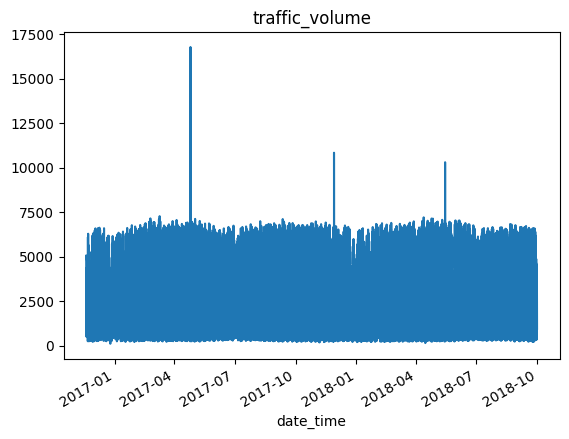

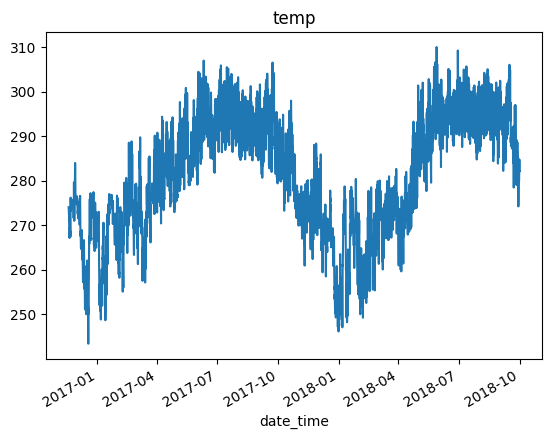

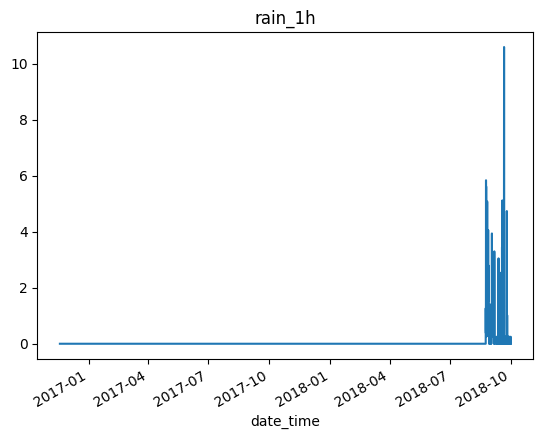

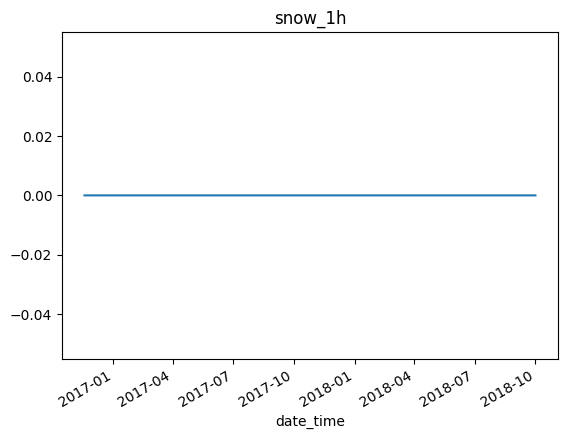

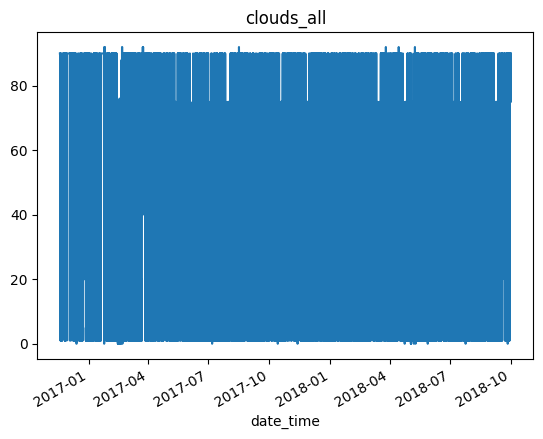

In [21]:
col=df[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]
for col in col:
  df[col].plot(title=col)
  plt.show()

In [22]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,16254.000000,16254.000000,16254.000000,16254.0,16254.000000
mean,3333.085210,281.279472,0.026377,0.0,43.234158
std,1977.763646,13.078025,0.262074,0.0,39.184760
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1310.250000,271.610000,0.000000,0.0,1.000000
50%,3516.000000,282.350000,0.000000,0.0,40.000000
75%,4958.000000,292.280000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [23]:
df['snow_1h'].unique()

array([0.])

In [24]:
df.shape

(16254, 7)

In [25]:
df.duplicated().sum()

3

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.index.duplicated().sum()

0

In [28]:
df.shape

(16251, 7)

In [29]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [30]:
df.drop(labels=['snow_1h','weather_main','weather_description'],axis=1,inplace=True)

In [31]:
df.shape

(16251, 4)

<Axes: >

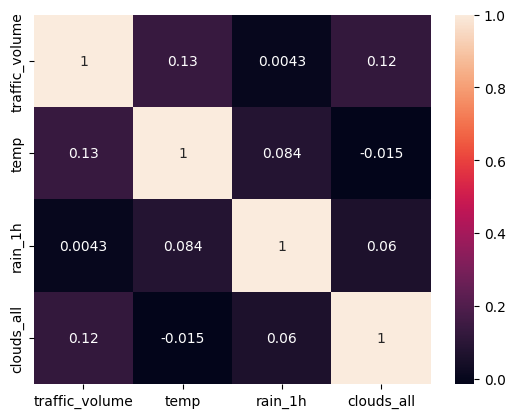

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
clouds_all,0


In [34]:
df.dropna(inplace=True)

In [35]:
print(col)

clouds_all


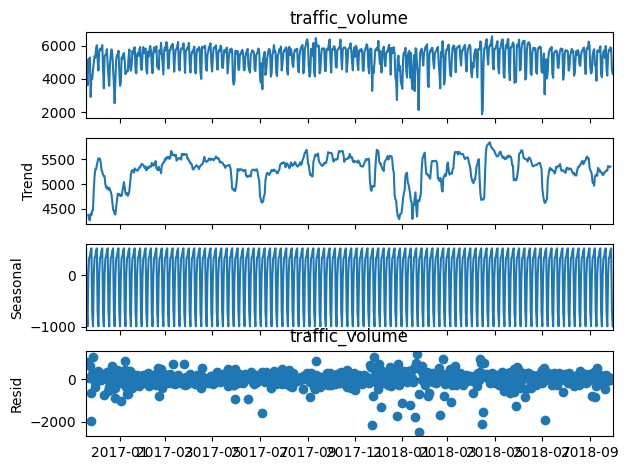

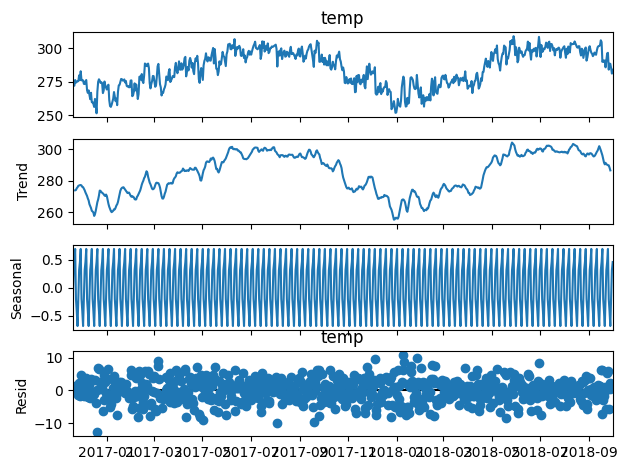

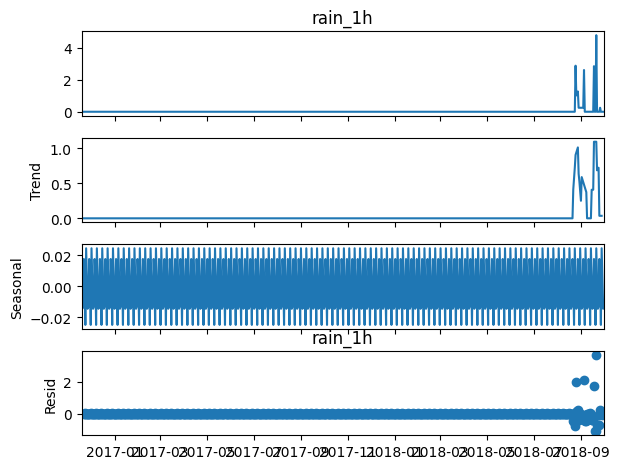

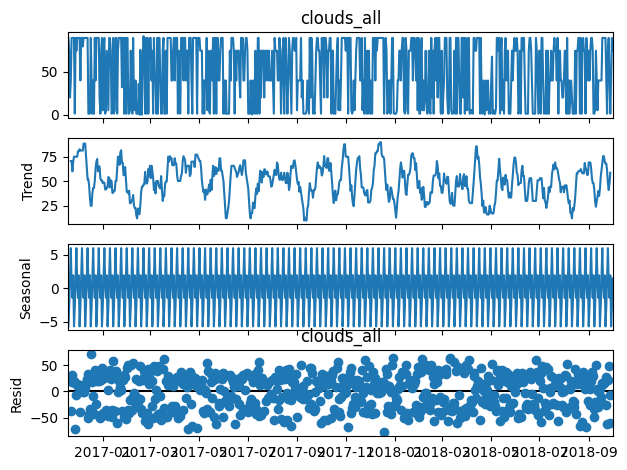

In [36]:
col=df[['traffic_volume','temp','rain_1h','clouds_all']]


result = seasonal_decompose(df['traffic_volume'].asfreq(freq='D', method='ffill'), model='additive')
result.plot()
plt.title('traffic_volume')
plt.show()

result = seasonal_decompose(df['temp'].asfreq(freq='D', method='ffill'), model='additive')
result.plot()
plt.title('temp')
plt.show()

result = seasonal_decompose(df['rain_1h'].asfreq(freq='D', method='ffill'), model='additive')
result.plot()
plt.title('rain_1h')
plt.show()

result = seasonal_decompose(df['clouds_all'].asfreq(freq='D', method='ffill'), model='additive')
result.plot()
plt.title('clouds_all')
plt.show()




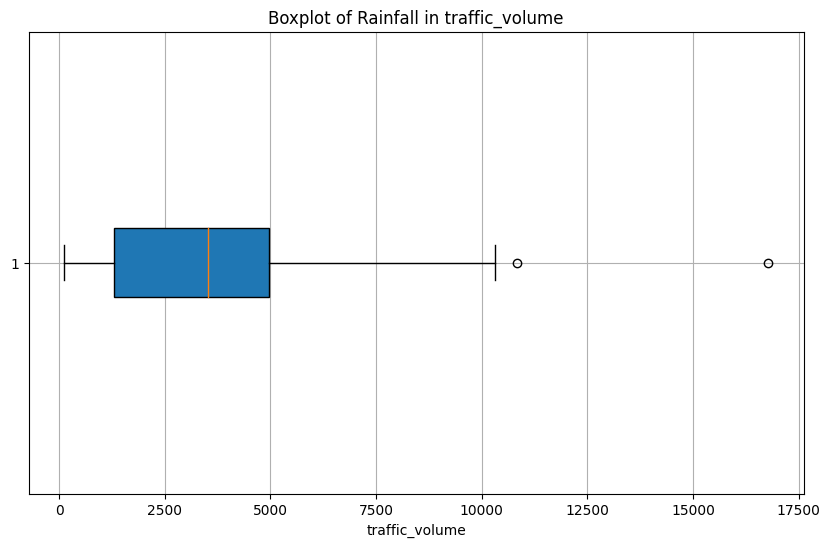

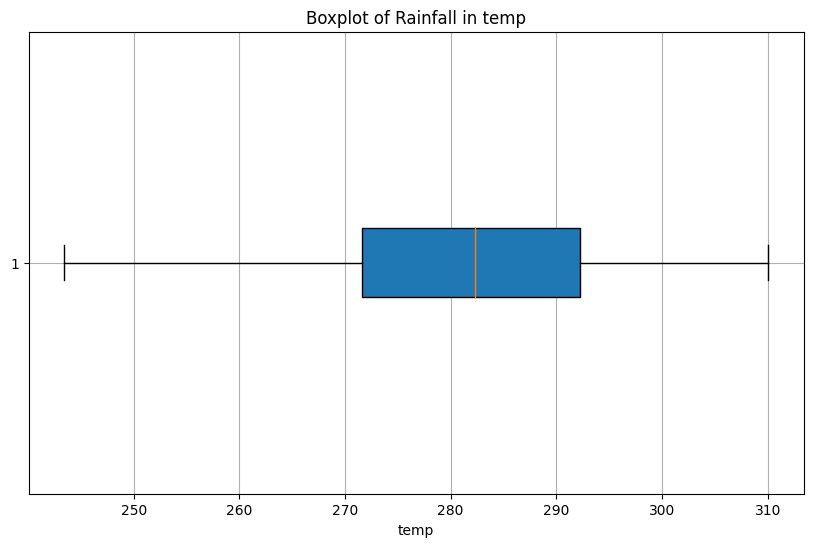

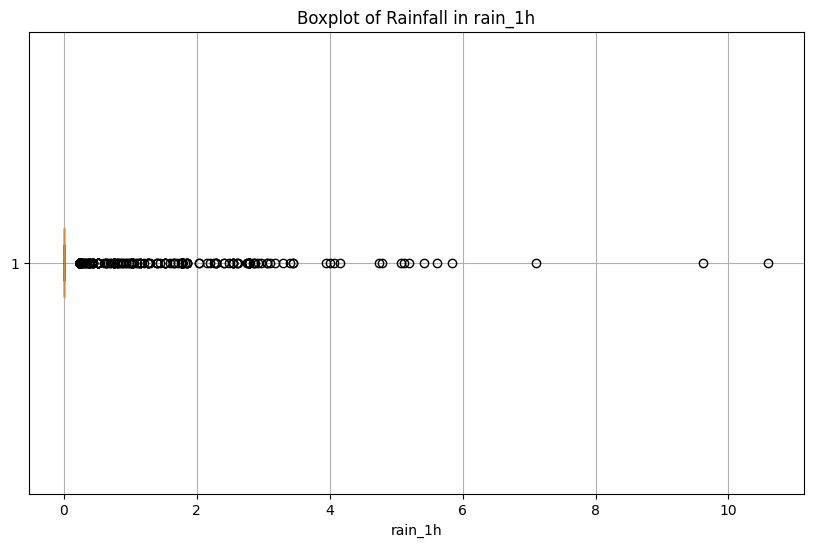

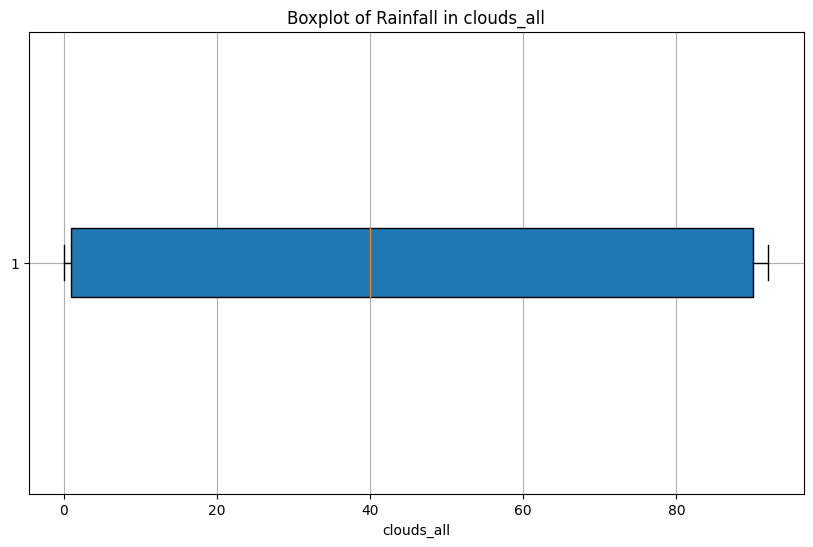

In [37]:
col=df[['traffic_volume','temp','rain_1h','clouds_all']]


plt.figure(figsize=(10, 6))
plt.boxplot(df['traffic_volume'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Rainfall in traffic_volume')
plt.xlabel('traffic_volume')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['temp'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Rainfall in temp')
plt.xlabel('temp')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['rain_1h'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Rainfall in rain_1h')
plt.xlabel('rain_1h')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['clouds_all'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Rainfall in clouds_all')
plt.xlabel('clouds_all')
plt.grid(True)
plt.show()

In [38]:
df.shape

(16251, 4)

In [39]:
import pandas as pd

Q1 = df['rain_1h'].quantile(0.25)
Q3 = df['rain_1h'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['rain_1h'] >= lower_bound) & (df['rain_1h'] <= upper_bound)]


In [40]:
df_no_outliers.shape

(15850, 4)

In [41]:
df=df_no_outliers

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [42]:
col=df[['traffic_volume','temp','rain_1h','clouds_all']]

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Create lag features for 'Rainfall_Bastia_Umbra'
df['traffic_volume_Lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_Lag2'] = df['traffic_volume'].shift(2)

# Create moving average features for 'Rainfall_Bastia_Umbra'
df['traffic_volume_MA3'] = df['traffic_volume'].rolling(window=3).mean()
df['traffic_volume_MA7'] = df['traffic_volume'].rolling(window=7).mean()

# Display the first few rows of the dataframe to check the new features
df.head(10)

<ipython-input-42-62395129b92a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_Lag1'] = df['traffic_volume'].shift(1)
<ipython-input-42-62395129b92a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_Lag2'] = df['traffic_volume'].shift(2)
<ipython-input-42-62395129b92a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,traffic_volume,temp,rain_1h,clouds_all,traffic_volume_Lag1,traffic_volume_Lag2,traffic_volume_MA3,traffic_volume_MA7
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,NaN,NaN,NaN,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,90,4872.0,NaN,NaN,NaN
2016-11-18 17:00:00,4328.0,273.62,0.0,90,5074.0,4872.0,4758.000000,NaN
2016-11-18 18:00:00,3486.0,273.59,0.0,90,4328.0,5074.0,4296.000000,NaN
2016-11-18 19:00:00,2524.0,273.58,0.0,90,3486.0,4328.0,3446.000000,NaN
2016-11-18 20:00:00,2027.0,273.28,0.0,90,2524.0,3486.0,2679.000000,NaN
2016-11-18 21:00:00,2160.0,273.47,0.0,90,2027.0,2524.0,2237.000000,3495.857143
2016-11-18 22:00:00,2012.0,273.15,0.0,90,2160.0,2027.0,2066.333333,3087.285714
2016-11-18 23:00:00,1356.0,273.02,0.0,40,2012.0,2160.0,1842.666667,2556.142857


In [43]:
df.sort_index(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [44]:
df['Prev_traffic_volume'] = df['traffic_volume'].shift(1)

<ipython-input-44-868b0f5ee10e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prev_traffic_volume'] = df['traffic_volume'].shift(1)


In [45]:
df['Diff_traffic_volume'] = df['traffic_volume'].diff()

<ipython-input-45-8bafaa34b1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff_traffic_volume'] = df['traffic_volume'].diff()


In [46]:
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day_of_Year'] = df.index.dayofyear


<ipython-input-46-09ac94e3c77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_of_Week'] = df.index.dayofweek
<ipython-input-46-09ac94e3c77c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month
<ipython-input-46-09ac94e3c77c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15850 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       15850 non-null  float64
 1   temp                 15850 non-null  float64
 2   rain_1h              15850 non-null  float64
 3   clouds_all           15850 non-null  int64  
 4   traffic_volume_Lag1  15849 non-null  float64
 5   traffic_volume_Lag2  15848 non-null  float64
 6   traffic_volume_MA3   15848 non-null  float64
 7   traffic_volume_MA7   15844 non-null  float64
 8   Prev_traffic_volume  15849 non-null  float64
 9   Diff_traffic_volume  15849 non-null  float64
 10  Day_of_Week          15850 non-null  int32  
 11  Month                15850 non-null  int32  
 12  Day_of_Year          15850 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.5 MB


<Axes: >

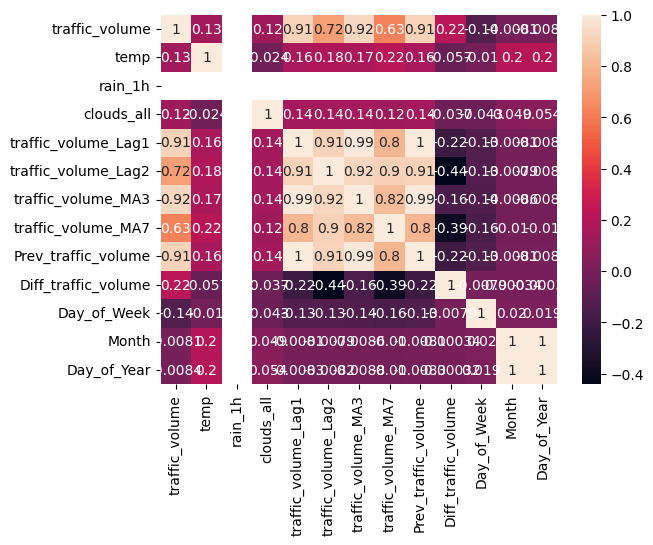

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
df['Day_of_Week'].isna().sum()

0

<Axes: >

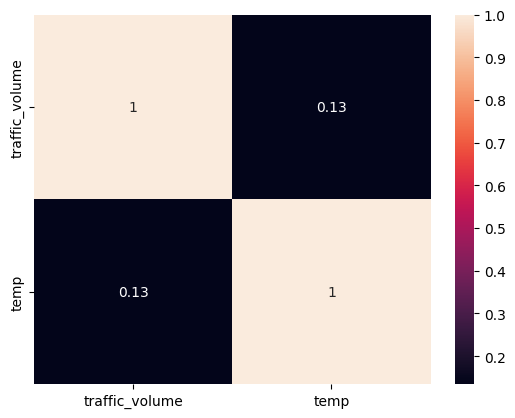

In [50]:
sns.heatmap(df[['traffic_volume','temp']].corr(),annot=True)

In [83]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
clouds_all,0
traffic_volume_Lag1,1
traffic_volume_Lag2,2
traffic_volume_MA3,2
traffic_volume_MA7,6
Prev_traffic_volume,1
Diff_traffic_volume,1


In [84]:
df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [88]:
train_data , test_data = train_test_split(df , test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)


In [89]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'clouds_all',
       'traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3',
       'traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume',
       'Day_of_Week', 'Month', 'Day_of_Year'],
      dtype='object')

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [90]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_data['traffic_volume'] = target_scaler.fit_transform(train_data[['traffic_volume']])
train_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']] = feature_scaler.fit_transform(train_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']])
val_data['traffic_volume'] = target_scaler.transform(val_data[['traffic_volume']])
val_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']] = feature_scaler.transform(val_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']])
test_data['traffic_volume'] = target_scaler.transform(test_data[['traffic_volume']])
test_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']] = feature_scaler.transform(test_data[['temp', 'rain_1h', 'clouds_all','traffic_volume_Lag1', 'traffic_volume_Lag2', 'traffic_volume_MA3','traffic_volume_MA7', 'Prev_traffic_volume', 'Diff_traffic_volume','Day_of_Week', 'Month', 'Day_of_Year']])

In [91]:
train_data = train_data.values
val_data = val_data.values
test_data = test_data.values

In [92]:
win_size = 30

train_Xy = timeseries_dataset_from_array(
    train_data,
    targets=train_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

test_Xy = timeseries_dataset_from_array(
    test_data,
    targets=test_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

val_Xy = timeseries_dataset_from_array(
    val_data,
    targets=val_data[win_size:,0],
    sequence_length=win_size,
    batch_size=32
)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [93]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=50, return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(units=1))
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [94]:
GRU_model = Sequential()
GRU_model.add(GRU(units=50))
GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))

GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [95]:
RNN_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
GRU_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [97]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [98]:
RNN_history = RNN_model.fit(train_Xy, epochs=30, validation_data=val_Xy,callbacks=early_stopping)

Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.1519 - mae: 0.2927 - val_loss: 0.0065 - val_mae: 0.0634
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.0241 - mae: 0.1203 - val_loss: 0.0023 - val_mae: 0.0345
Epoch 3/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0107 - mae: 0.0812 - val_loss: 0.0023 - val_mae: 0.0347
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0064 - mae: 0.0629 - val_loss: 0.0021 - val_mae: 0.0339
Epoch 5/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0048 - mae: 0.0541 - val_loss: 0.0018 - val_mae: 0.0305
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0036 - mae: 0.0465 - val_loss: 0.0024 - val_mae: 0.0371
Epoch 7/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0032 - mae: 0.0439 - val_loss: 0.0017 - val_mae: 0.0297
Epoch 8/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0017 - val_mae: 0.0298
Epoch 9/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 11m

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [99]:
rnn_predictions = RNN_model.predict(train_Xy)
rnn_predictions_test = RNN_model.predict(test_Xy)
rnn_predictions_val = RNN_model.predict(val_Xy)

346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [100]:
rnn_predictions = target_scaler.inverse_transform(rnn_predictions)
rnn_predictions_test = target_scaler.inverse_transform(rnn_predictions_test)
rnn_predictions_val = target_scaler.inverse_transform(rnn_predictions_val)

In [101]:
RNN_model.evaluate(train_Xy)
RNN_model.evaluate(test_Xy)
RNN_model.evaluate(val_Xy)

346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014 - mae: 0.0268
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - mae: 0.0229
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mae: 0.0236


[0.0012301895767450333, 0.023913808166980743]

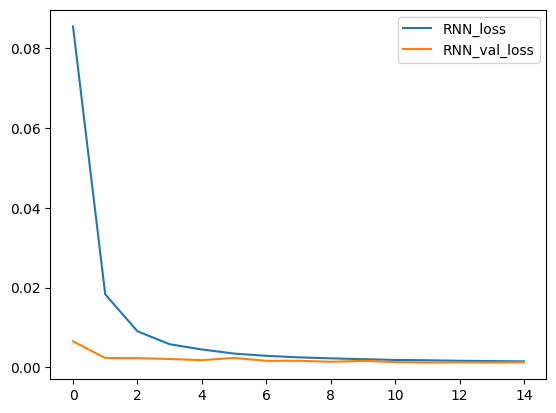

In [102]:
plt.plot(RNN_history.history['loss'],label='RNN_loss')
plt.plot(RNN_history.history['val_loss'],label='RNN_val_loss')
plt.legend()
plt.show()

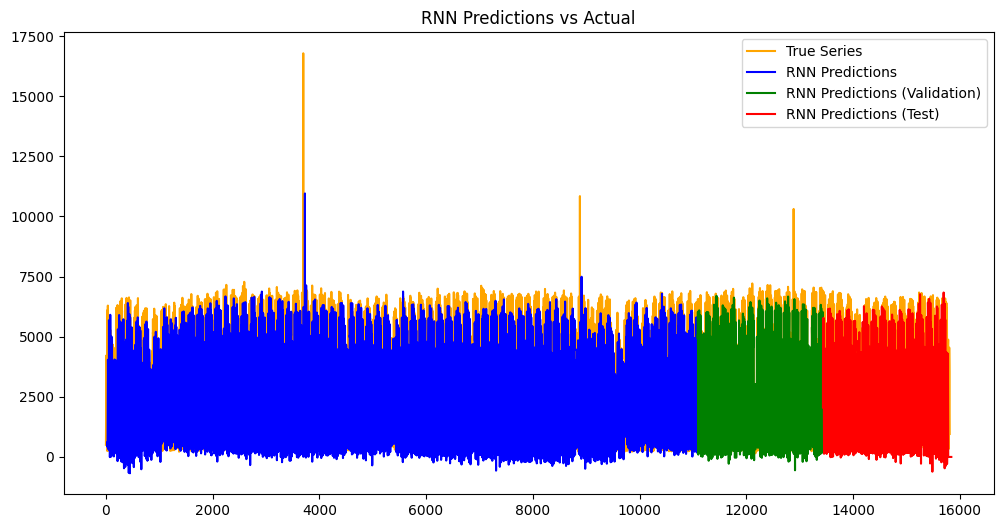

In [114]:
import matplotlib.pyplot as plt
rnn_arr = np.zeros(len(df))
rnn_arr[:win_size] = np.nan


rnn_arr[win_size:len(rnn_predictions)+win_size] = rnn_predictions.flatten()
rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size] = rnn_predictions_val.flatten()
rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+len(rnn_predictions_test)+win_size] = rnn_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='orange')
plt.plot(rnn_arr[:len(rnn_predictions)+win_size], label='RNN Predictions', color='blue')
plt.plot(np.arange(len(rnn_predictions)+win_size, len(rnn_predictions)+len(rnn_predictions_val)+win_size),
         rnn_arr[len(rnn_predictions)+win_size:len(rnn_predictions)+len(rnn_predictions_val)+win_size],
         label='RNN Predictions (Validation)', color='green')
plt.plot(np.arange(len(rnn_predictions)+len(rnn_predictions_val)+win_size, len(rnn_arr)),
         rnn_arr[len(rnn_predictions)+len(rnn_predictions_test)+win_size:],
         label='RNN Predictions (Test)', color='red')

plt.legend()
plt.title('RNN Predictions vs Actual')
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [104]:
GRU_history = GRU_model.fit(train_Xy, epochs=20, validation_data=val_Xy,callbacks=early_stopping)

Epoch 1/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0173 - mae: 0.0995 - val_loss: 0.0033 - val_mae: 0.0389
Epoch 2/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0043 - mae: 0.0507 - val_loss: 0.0020 - val_mae: 0.0297
Epoch 3/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0028 - mae: 0.0405 - val_loss: 0.0018 - val_mae: 0.0272


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [105]:
GRU_predictions = GRU_model.predict(train_Xy)
GRU_predictions_test = GRU_model.predict(test_Xy)
GRU_predictions_val = GRU_model.predict(val_Xy)

346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [106]:
GRU_predictions = target_scaler.inverse_transform(GRU_predictions)
GRU_predictions_test = target_scaler.inverse_transform(GRU_predictions_test)
GRU_predictions_val = target_scaler.inverse_transform(GRU_predictions_val)

In [107]:
GRU_model.evaluate(train_Xy)
GRU_model.evaluate(test_Xy)
GRU_model.evaluate(val_Xy)

346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0029 - mae: 0.0371
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mae: 0.0363
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0389


[0.0032676716800779104, 0.03886325657367706]

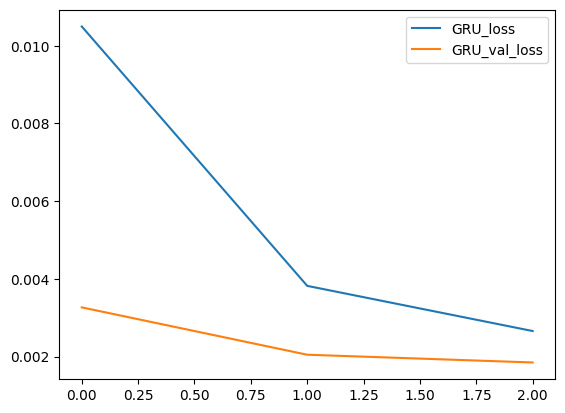

In [108]:
plt.plot(GRU_history.history['loss'],label='GRU_loss')
plt.plot(GRU_history.history['val_loss'],label='GRU_val_loss')
plt.legend()
plt.show()


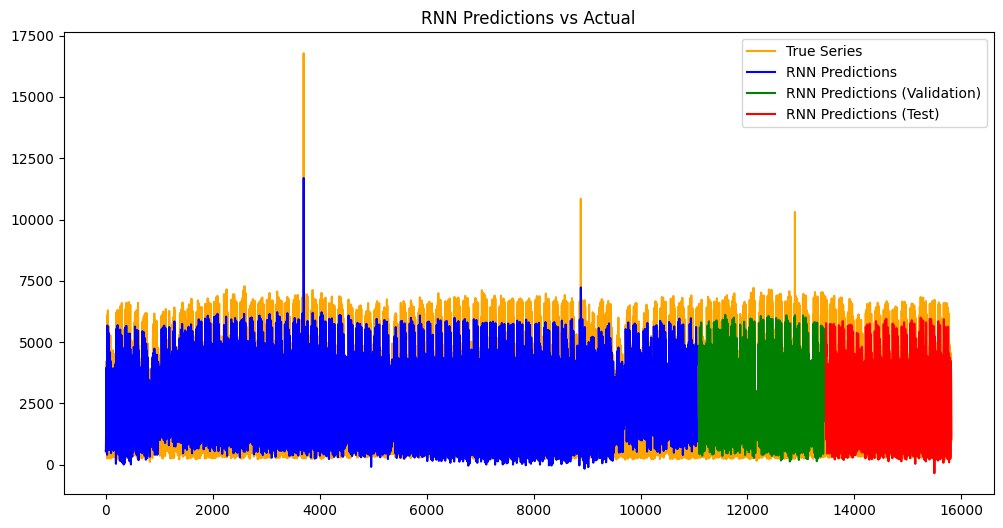

In [113]:
import matplotlib.pyplot as plt
GRU_arr = np.zeros(len(df))
GRU_arr[:win_size] = np.nan





GRU_arr[win_size:len(GRU_predictions)+win_size] = GRU_predictions.flatten()
GRU_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size] = GRU_predictions_val.flatten()
GRU_arr[len(GRU_predictions)+len(GRU_predictions_val)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+len(GRU_predictions_test)+win_size] = GRU_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[win_size:,0].values, label='True Series',color='orange')
plt.plot(GRU_arr[win_size:len(GRU_predictions)+win_size], label='RNN Predictions', color='blue')
plt.plot(np.arange(len(GRU_predictions)+win_size, len(GRU_predictions)+len(GRU_predictions_val)+win_size),
         GRU_arr[len(GRU_predictions)+win_size:len(GRU_predictions)+len(GRU_predictions_val)+win_size],
         label='RNN Predictions (Validation)', color='green')
plt.plot(np.arange(len(GRU_predictions)+len(GRU_predictions_val)+win_size+30, len(GRU_arr)-30),
         GRU_arr[len(GRU_predictions)+len(GRU_predictions_test)+win_size:-60],
         label='RNN Predictions (Test)', color='red')

plt.legend()
plt.title('RNN Predictions vs Actual')
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:



1.   i droped the null values as it was a realy small subset of the data the i droped the objects columns as the have a numrical represntion and i droped the snow column as it did not have any values but 0 so it does not affect the data

2.   i craeted lags and moveing avrage as requsted i used shift for the lags it was shift(1) for lag1 shit(2)for lag 2  and i used rolling for the moving avrage
i used shift(1) for the previous day of traffic
and diff function for the diffrent column
then i created new columns such as day of the week month and day of the year and in this i used =
index.dayofweek  
index.month
index.dayofyear

to extract the informition nedded

then i drop the newly created null values as it was small number

3.   in the rnn model i crated 2 layers of smpile rnn and two dropout layers to preventover fitting then on output layer and i created early stoping and fit the model with it to prevent over fitting as well and i chose this Architecture becuse of it's simplisty and it's geart preformenc after trying diffrent Architecture
in the GRU model i used on lauer of the GRU and on dropout layer to prevent overfitting then one output layer and i created early stoping and fit the model with it to prevent over fitting as well and i chose this Architecture becuse of it's simplisty and it's geart preformenc after trying diffrent Architecture and GRU nedded just one layer not like RNN becuse of it's complicted Architecture

4.   i stared by trying diffrent combnaiton before i chose the one that i submited so after series of try and error i came to the understanding that this is the best choise of epoch and batch size of my fitting

5.   i used mse in the loss function becuse of what we learnd in the lacutre and after i exprimnted with the model mse has given me the best outcome


7.   i did not have over nor under fitting as i build my models the dropouts and early stoping from the start


8.   in the futer i would improve the model by using fine tunning to have the best preformence possible

